<h1> <center> ENSF 519.01 Applied Data Scince </center></h1>
<h2> <center> Solutions for the sample questions on feature engineering and model evaluation</center></h2>

<h1>Part A. Feature Selection </h1>
<br>

In this section, we are going to select the most informative features from the NASA dataset.


<h2>Part A.1. Feature selection using ANOVA </h2>

Steps:
    
- Read data from the NASA.csv
- Using ANOVA select top K features, whith K=[1..10]
- Build LogisticRegression models, one with the original data, and one for each K (using a subset of feature)
- Compare the accuracies and find the best K (use random_state=0)


In [3]:
## Part A.1 ANOVA 

## Part A.1 Solution

import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

def CSV_Reader(Filename):
  data_target=pd.read_csv(Filename)
  return [data_target.iloc[:,:-1],data_target.iloc[:,-1]]

features,lables=CSV_Reader("NasaData.csv")

X_train, X_test, y_train, y_test = train_test_split(features, lables, random_state=0, test_size=.25)

lr = LogisticRegression().fit(X_train, y_train)
print("LogisReg: ",lr.score(X_test, y_test))

for K in range(1,11):

    ANOVA_select = SelectKBest(k=K).fit(X_train, y_train)
    X_train_selected = ANOVA_select.transform(X_train)
    X_test_selected = ANOVA_select.transform(X_test)
    slr = LogisticRegression().fit(X_train_selected, y_train)
    print("ANOVA k="+str(K)+": ", slr.score(X_test_selected, y_test))
        




LogisReg:  0.7970195272353545
ANOVA k=1:  0.7954779033915724
ANOVA k=2:  0.7954779033915724
ANOVA k=3:  0.7949640287769785
ANOVA k=4:  0.7944501541623844
ANOVA k=5:  0.7954779033915724
ANOVA k=6:  0.7959917780061665
ANOVA k=7:  0.7959917780061665
ANOVA k=8:  0.7965056526207606
ANOVA k=9:  0.7965056526207606
ANOVA k=10:  0.7954779033915724


<h2>Part A.2. Compare feature selection models </h2>

Now apply SelectFromModel and RFE and compare them with SelectKBest, as follows:

- Apply the three techniques so that you reduce the features to only 6 features (note that 6 is not necessarily the best K from Part A.1)
- Report the prediction scores of a LogisticRegression model on the selected features of each model.
- Print the name of features selected by each model.


	**** ANOVA ****
Features selected: **['LOC_BLANK', 'HALSTEAD_CONTENT', 'HALSTEAD_LENGTH', 'NUM_OPERANDS', 'NUM_UNIQUE_OPERANDS', 'LOC_TOTAL']**
** Test score: 0.796 **
**Data shape after selection: (5836, 6)**


	**** selectFromModel ****
Features selected: **['LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_EFFORT', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'LOC_TOTAL']**
** Test score: 0.794 **
**Data shape after selection: (5836, 6)**


	**** RFEselect ****
Features selected: **['HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'LOC_TOTAL']**
** Test score: 0.793 **
**Data shape after selection: (5836, 6)**




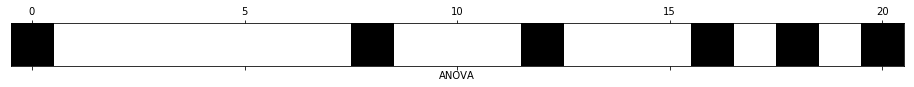

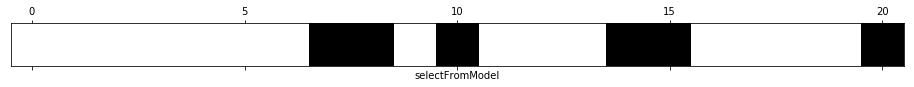

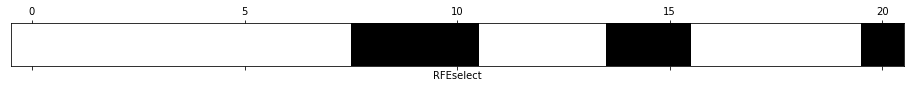

In [6]:
## Part A.2 Compare feature selection models 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

def plot_selection(selectFeature,funcName,X_train, X_test, y_train, y_test):
    mask = selectFeature.get_support()
    print("\t**** "+funcName+" ****")
    print("Features selected: **{}**".format([list(features.columns.values)[i] for i in np.where(mask == True)[0]]))
    plt.matshow(mask.reshape(1, -1), cmap='gray_r')
    plt.xlabel(funcName)
    plt.yticks(())

    X_train_transformed = selectFeature.transform(X_train)
    X_test_transformed = selectFeature.transform(X_test)
    score = LogisticRegression().fit(X_train_transformed, y_train).score(X_test_transformed, y_test)
    print("** Test score: {:.3f} **".format(score))
    print("**Data shape after selection: {}**\n\n".format(X_train_transformed.shape))
    
    
features,lables=CSV_Reader("NasaData.csv")
X_train, X_test, y_train, y_test = train_test_split(features, lables, random_state=0, test_size=.25)

ANOVA_select = SelectKBest(k=6).fit(X_train, y_train)
plot_selection(ANOVA_select,"ANOVA",X_train, X_test, y_train, y_test)

selectFModel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0),threshold="1.25*mean").fit(X_train, y_train)
plot_selection(selectFModel,"selectFromModel",X_train, X_test, y_train, y_test)

RFEselect = RFE(RandomForestClassifier(n_estimators=100, random_state=0),n_features_to_select=6).fit(X_train, y_train)
plot_selection(RFEselect,"RFEselect",X_train, X_test, y_train, y_test)


<h1>Part B. Data Tranformation </h1>

In this part, you are going to work with a new data set which contains some the features of a house collected over time. 
The objective of this part is to help improve linear model's predicitons using data transformation.

<h2>Part B.1 Binning </h2>

Our first try is using binning, as follows:

- Read form MyHouse.csv (take 'Light' as the data target and the rest of the columns as data features ) 
- First apply a LinearRegression on the original data to predict the target and report the score of the model on the test set. 
- Now apply binning on all three columns 
 (for Temperature make 5 Bins -- for Humidity make 10 bins -- and for CO2Bins make 11 bins)
- Print your data shape before and after binning.
- Now again apply LinearRegression on the new data and report the score again. 



In [8]:
## Part B.1 Compare feature selection models 


from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

def Evaluate(features_one,features_two,lables,FunctionName):
    X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(features_one, lables, random_state=0, test_size=.25)
    X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(features_two, lables, random_state=0, test_size=.25)

    score_one = LinearRegression().fit(X_train_one, y_train_one).score(X_test_one, y_test_one)
    score_two = LinearRegression().fit(X_train_two, y_train_two).score(X_test_two, y_test_two)

    print("** Test score before "+FunctionName+": {:.3f} **".format(score_one))
    print("**Data shape before "+FunctionName+": {}**\n\n".format(X_train_one.shape))
    
    print("** Test score after "+FunctionName+": {:.3f} **".format(score_two))
    print("**Data shape after "+FunctionName+": {}**\n\n".format(X_train_two.shape))
    
features,lables=CSV_Reader("MyHouse.csv")

TemperatureBins = np.linspace(20, 25, 6)
HumidityBins = np.linspace(22, 32, 11)
CO2Bins = np.linspace(400,1500,12)

features['Temperature'] = np.digitize(features['Temperature'], bins=TemperatureBins)
features['Humidity'] = np.digitize(features['Humidity'], bins=HumidityBins)
features['CO2'] = np.digitize(features['CO2'], bins=CO2Bins)

TemperatureEncoder = OneHotEncoder(sparse=False)
TemperatureEncoder.fit(features['Temperature'].values.reshape(-1, 1))
TemperatureBinned = pd.DataFrame(TemperatureEncoder.transform(features['Temperature'].values.reshape(-1, 1)))
TemperatureBinned.columns = ["Temperature:"+str(i)+"to"+str(i+1) for i in range(20, 25)]

HumidityEncoder = OneHotEncoder(sparse=False)
HumidityEncoder.fit(features['Humidity'].values.reshape(-1, 1))
HumidityBinned = pd.DataFrame(HumidityEncoder.transform(features['Humidity'].values.reshape(-1, 1)))
HumidityBinned.columns = ["Humidity:"+str(i)+"to"+str(i+10) for i in range(22, 32, 1)]


CO2Encoder = OneHotEncoder(sparse=False)
CO2Encoder.fit(features['CO2'].values.reshape(-1, 1))
CO2Binned = pd.DataFrame(CO2Encoder.transform(features['CO2'].values.reshape(-1, 1)))
CO2Binned.columns = ["CO2:"+str(i)+"to"+str(i+100) for i in range(400,1500,100)]

binnedFeatures=pd.concat([TemperatureBinned,HumidityBinned,CO2Binned], axis=1)

Evaluate(features,binnedFeatures,lables,"Binning")

** Test score before Binning: 0.675 **
**Data shape before Binning: (1998, 3)**


** Test score after Binning: 0.816 **
**Data shape after Binning: (1998, 26)**




/Users/hemmati/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


<h2>Part B.2 Polynomials </h2>

To compare polynomials and binning, apply polynomials on all three features. 
- Use degree=6.
- Print your data shape before and after transformation
- Apply LinearRegression on the new data and report the score again. 


In [9]:
## Part B.2 Compare feature selection models 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression


features,lables=CSV_Reader("MyHouse.csv")

TemperaturePoly = PolynomialFeatures(degree=6, include_bias=False).fit(features['Temperature'].values.reshape(-1, 1))
Temperature_poly_transformed = pd.DataFrame(TemperaturePoly.transform(features['Temperature'].values.reshape(-1, 1)))
Temperature_poly_transformed.columns = ["Temperature^"+str(i) for i in range(1,7)]

HumidityPoly = PolynomialFeatures(degree=6, include_bias=False).fit(features['Humidity'].values.reshape(-1, 1))
Humidity_poly_transformed = pd.DataFrame(HumidityPoly.transform(features['Humidity'].values.reshape(-1, 1)))
Humidity_poly_transformed.columns = ["Humidity^"+str(i) for i in range(1,7)]

CO2Poly = PolynomialFeatures(degree=6, include_bias=False).fit(features['CO2'].values.reshape(-1, 1))
CO2_poly_transformed = pd.DataFrame(CO2Poly.transform(features['CO2'].values.reshape(-1, 1)))
CO2_poly_transformed.columns = ["CO2^"+str(i) for i in range(1,7)]

Features_poly_transformed=pd.concat([Temperature_poly_transformed,Humidity_poly_transformed,CO2_poly_transformed], axis=1)

Evaluate(features,Features_poly_transformed,lables,"polynomial")

** Test score before polynomial: 0.692 **
**Data shape before polynomial: (1998, 3)**


** Test score after polynomial: 0.814 **
**Data shape after polynomial: (1998, 18)**


